In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Letter\Letter_NN_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,2.0,4.0,NaN,3.0,2.0,NaN,8.0,2.0,9.0,11.0,NaN,7.0,1.0,8.0,NaN,6.0,NaN
1,4.0,7.0,5.0,5.0,5.0,5.0,9.0,6.0,4.0,8.0,7.0,9.0,NaN,9.0,7.0,10.0,NaN
2,7.0,10.0,8.0,7.0,4.0,8.0,8.0,5.0,10.0,NaN,2.0,8.0,2.0,5.0,5.0,10.0,NaN
3,4.0,9.0,5.0,7.0,4.0,7.0,7.0,NaN,1.0,7.0,6.0,8.0,3.0,8.0,0.0,8.0,NaN
4,6.0,7.0,8.0,5.0,4.0,7.0,6.0,3.0,7.0,10.0,7.0,9.0,3.0,8.0,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5.0,NaN,5.0,8.0,3.0,NaN,10.0,7.0,8.0,12.0,10.0,NaN,2.0,9.0,2.0,6.0,NaN
19996,4.0,7.0,6.0,5.0,3.0,7.0,8.0,NaN,NaN,12.0,6.0,8.0,1.0,NaN,6.0,8.0,NaN
19997,4.0,8.0,4.0,6.0,4.0,7.0,8.0,7.0,4.0,10.0,7.0,6.0,3.0,9.0,3.0,7.0,NaN
19998,4.0,11.0,NaN,NaN,3.0,0.0,2.0,4.0,6.0,1.0,NaN,7.0,0.0,8.0,0.0,8.0,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	2000
float64		column 2	2250
float64		column 3	2000
float64		column 4	1750
float64		column 5	2000
float64		column 6	1750
float64		column 7	2000
float64		column 8	1750
float64		column 9	2250
float64		column 10	2750
float64		column 11	2500
float64		column 12	2750
float64		column 13	2000
float64		column 14	1500
float64		column 15	1750
float64		column 16	1000
float64		column 17	20000


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
count,18000.000000,17750.000000,18000.000000,18250.000000,18000.000000,18250.000000,18000.000000,18250.000000,17750.000000,17250.000000,17500.000000,17250.00000,18000.000000,18500.000000,18250.000000,19000.000000,0.0
mean,4.007889,7.064563,5.120000,5.390849,3.476222,6.909589,7.495667,4.605753,5.189408,8.236116,6.430514,7.92000,3.013889,8.327676,3.684822,7.803684,NaN
std,1.850440,3.185833,1.943144,2.194088,2.121220,1.959489,2.228286,2.616735,2.297954,2.372828,2.485877,1.95763,2.247561,1.506704,2.493425,1.584169,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,NaN
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,7.000000,3.000000,4.000000,7.000000,5.000000,7.00000,2.000000,8.000000,2.000000,7.000000,NaN
50%,4.000000,7.000000,5.000000,6.000000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.000000,8.00000,3.000000,8.000000,3.000000,8.000000,NaN
75%,5.000000,9.000000,6.000000,7.000000,5.000000,8.000000,8.000000,6.000000,7.000000,10.000000,8.000000,9.00000,4.000000,9.000000,5.000000,8.000000,NaN
max,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,NaN


<AxesSubplot:>

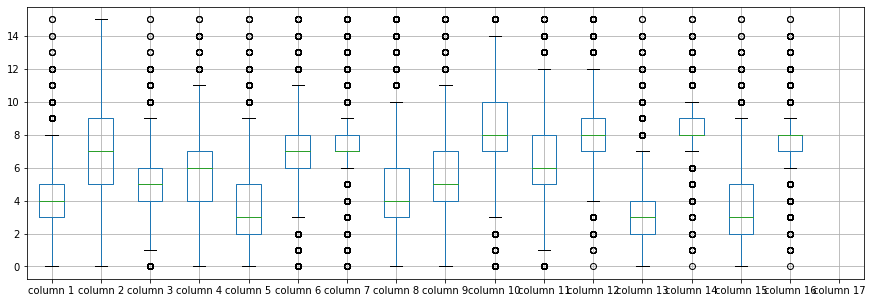

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     4.007889
column 2     7.064563
column 3     5.120000
column 4     5.390849
column 5     3.476222
column 6     6.909589
column 7     7.495667
column 8     4.605753
column 9     5.189408
column 10    8.236116
column 11    6.430514
column 12    7.920000
column 13    3.013889
column 14    8.327676
column 15    3.684822
column 16    7.803684
column 17         NaN
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
column 1,1.000000,0.733691,0.840294,0.647401,0.601075,-0.031253,0.041161,0.013570,0.042088,0.140125,0.033909,-0.042155,0.467225,0.095841,0.264160,-0.100155,NaN
column 2,0.733691,1.000000,0.644127,0.807335,0.533034,0.041260,-0.041431,-0.023916,0.084705,0.148593,-0.057236,-0.006046,0.256002,0.000879,0.216416,-0.044863,NaN
column 3,0.840294,0.644127,1.000000,0.636151,0.749663,0.056298,0.019916,-0.095718,0.044052,0.108361,0.008759,-0.044508,0.534167,0.045056,0.247207,-0.117516,NaN
column 4,0.647401,0.807335,0.636151,1.000000,0.623261,0.040581,-0.023598,0.077218,0.053415,0.009116,-0.017070,0.017812,0.247057,0.021686,0.279168,-0.017631,NaN
column 5,0.601075,0.533034,0.749663,0.623261,1.000000,0.129337,-0.027886,-0.009973,-0.063566,-0.059377,-0.065730,-0.041551,0.604449,0.010935,0.470075,-0.065869,NaN
column 6,-0.031253,0.041260,0.056298,0.040581,0.129337,1.000000,-0.357169,-0.051907,-0.115849,0.064379,-0.334419,-0.027965,0.141794,-0.240237,0.120597,0.238830,NaN
column 7,0.041161,-0.041431,0.019916,-0.023598,-0.027886,-0.357169,1.000000,-0.110110,-0.055006,0.168998,0.570330,-0.251983,-0.038302,0.527412,-0.078820,-0.200402,NaN
column 8,0.013570,-0.023916,-0.095718,0.077218,-0.009973,-0.051907,-0.110110,1.000000,-0.162998,-0.309179,0.027634,0.079804,0.129193,-0.079106,0.013960,0.177637,NaN
column 9,0.042088,0.084705,0.044052,0.053415,-0.063566,-0.115849,-0.055006,-0.162998,1.000000,0.126702,-0.058671,0.101999,-0.359415,-0.045529,0.247968,-0.055501,NaN
column 10,0.140125,0.148593,0.108361,0.009116,-0.059377,0.064379,0.168998,-0.309179,0.126702,1.000000,0.052354,-0.114022,-0.165353,0.028043,-0.082815,-0.109929,NaN


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [17,17+2,17+2+2,17+2+2+2,17+2+2,17+2,17], vae_layer = False, seed = 20)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [17]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 71.21267521667481
Epoch: 1 , loss: 45.43077724609375
Epoch: 2 , loss: 41.178330517578125
Epoch: 3 , loss: 39.45260751647949
Epoch: 4 , loss: 38.55054279022217
Epoch: 5 , loss: 37.66482312011719
Epoch: 6 , loss: 37.370665254211424
Epoch: 7 , loss: 37.2950115020752
Epoch: 8 , loss: 37.01716962738037
Epoch: 9 , loss: 36.88331917114258
Epoch: 10 , loss: 36.76981534423828
Epoch: 11 , loss: 36.76476367340088
Epoch: 12 , loss: 36.50728181915283
Epoch: 13 , loss: 36.3759454498291
Epoch: 14 , loss: 36.33449847412109
Epoch: 15 , loss: 36.29531182861328
Epoch: 16 , loss: 36.334961824035645
Epoch: 17 , loss: 36.20955096130371
Epoch: 18 , loss: 36.11708498535156
Epoch: 19 , loss: 36.18363559417725
Epoch: 20 , loss: 36.123564347839356
Epoch: 21 , loss: 36.08748746795654
Epoch: 22 , loss: 36.02402156829834
Epoch: 23 , loss: 35.90390712890625
Epoch: 24 , loss: 35.97763392944336
Epoch: 25 , loss: 35.78098914489746
Epoc

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(20000, 17)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     3.000000
column 2     7.000000
column 3     3.000000
column 4     5.000000
column 5     1.000000
column 6     1.000000
column 7     7.308041
column 8     5.000000
column 9     5.000000
column 10    0.000000
column 11    6.272346
column 12    7.786500
column 13    2.935688
column 14    8.000000
column 15    0.000000
column 16    8.000000
column 17   -0.002879
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Letter.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,0.0,0.000000,1.066895,0.000000,0.000000,-0.023574,0.0,0.000000,0.000000,0.00000,-0.588719,0.000000,0.000000,0.000000,-1.404995,0.000000,NaN
1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,1.013582,0.000000,0.000000,0.000000,NaN
2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-5.88732,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-6.817890,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
4,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,2.378583,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.0,-0.507278,0.000000,0.000000,0.000000,4.752069,0.0,0.000000,0.000000,0.00000,0.000000,0.975206,0.000000,0.000000,0.000000,0.000000,NaN
19996,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.470465,-6.016853,0.00000,0.000000,0.000000,0.000000,-2.601098,0.000000,0.000000,NaN
19997,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
19998,0.0,0.000000,1.503664,-2.234379,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,7.092223,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

575.3555173208921

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

3733.8164121981144

In [18]:
NRMS=numerator/denominator
NRMS


0.15409314594077156

In [19]:
new_df.iloc[66,:]

column 1      6.000000
column 2      9.000000
column 3     10.000000
column 4      7.000000
column 5     11.000000
column 6     10.000000
column 7      5.000000
column 8      2.558079
column 9      2.000000
column 10     9.000000
column 11     4.000000
column 12     8.000000
column 13    11.000000
column 14     6.000000
column 15     4.000000
column 16     7.000000
column 17    -0.000497
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,2.0,4.000000,5.066895,3.000000,2.000000,6.976426,8.0,2.000000,9.000000,11.00000,6.411281,7.000000,1.000000,8.000000,3.595005,6.000000,-0.004058
1,4.0,7.000000,5.000000,5.000000,5.000000,5.000000,9.0,6.000000,4.000000,8.00000,7.000000,9.000000,3.013582,9.000000,7.000000,10.000000,-0.003373
2,7.0,10.000000,8.000000,7.000000,4.000000,8.000000,8.0,5.000000,10.000000,5.11268,2.000000,8.000000,2.000000,5.000000,5.000000,10.000000,-0.002111
3,4.0,9.000000,5.000000,7.000000,4.000000,7.000000,7.0,6.182110,1.000000,7.00000,6.000000,8.000000,3.000000,8.000000,0.000000,8.000000,-0.003354
4,6.0,7.000000,8.000000,5.000000,4.000000,7.000000,6.0,3.000000,7.000000,10.00000,7.000000,9.000000,3.000000,8.000000,3.000000,9.378583,-0.004561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5.0,9.492722,5.000000,8.000000,3.000000,8.752069,10.0,7.000000,8.000000,12.00000,10.000000,9.975206,2.000000,9.000000,2.000000,6.000000,-0.004195
19996,4.0,7.000000,6.000000,5.000000,3.000000,7.000000,8.0,3.470465,3.983147,12.00000,6.000000,8.000000,1.000000,6.398902,6.000000,8.000000,-0.001930
19997,4.0,8.000000,4.000000,6.000000,4.000000,7.000000,8.0,7.000000,4.000000,10.00000,7.000000,6.000000,3.000000,9.000000,3.000000,7.000000,-0.000731
19998,4.0,11.000000,5.503664,5.765621,3.000000,0.000000,2.0,4.000000,6.000000,1.00000,7.092223,7.000000,0.000000,8.000000,0.000000,8.000000,-0.003244


In [21]:
imputations[-1].to_excel("Letter_NN_10(imp).xlsx", index=False, header=False)